# Data Mining - Clustering - K Means

In [24]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
import plotly.express as px

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

sns.set()

In [35]:
data = pd.read_csv('data_cleaned.csv')
data_raw = pd.read_sas('a2z_insurance.sas7bdat', index = 'CustID')
data_unscaled = pd.read_csv('data_cleaned_uscaled.csv')

### Defining the number of clusters:

#### Inertia (within-cluster sum-of-squares distance)

In [3]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(data)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    

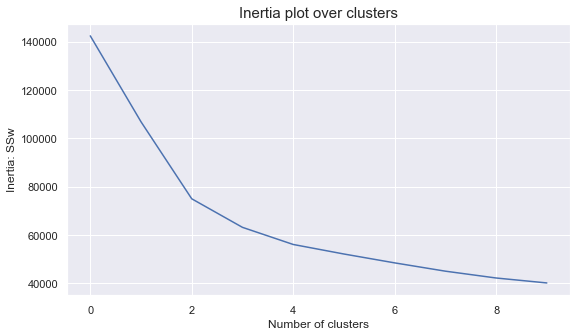

In [4]:
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

#### Silhouette Coefficient

For n_clusters = 2, the average silhouette_score is : 0.3328814257164395
For n_clusters = 3, the average silhouette_score is : 0.32788114328927975
For n_clusters = 4, the average silhouette_score is : 0.220994794541121
For n_clusters = 5, the average silhouette_score is : 0.23072248320739747
For n_clusters = 6, the average silhouette_score is : 0.19776448239532451
For n_clusters = 7, the average silhouette_score is : 0.2148468001160881
For n_clusters = 8, the average silhouette_score is : 0.19977464513207802
For n_clusters = 9, the average silhouette_score is : 0.1895818127961934
For n_clusters = 10, the average silhouette_score is : 0.18438246837161873


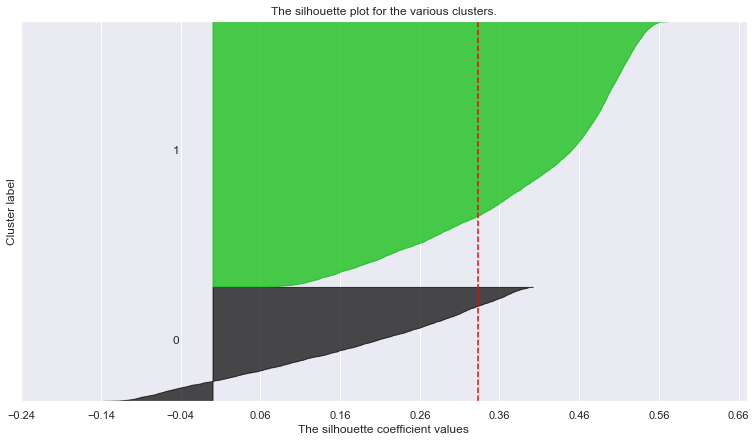

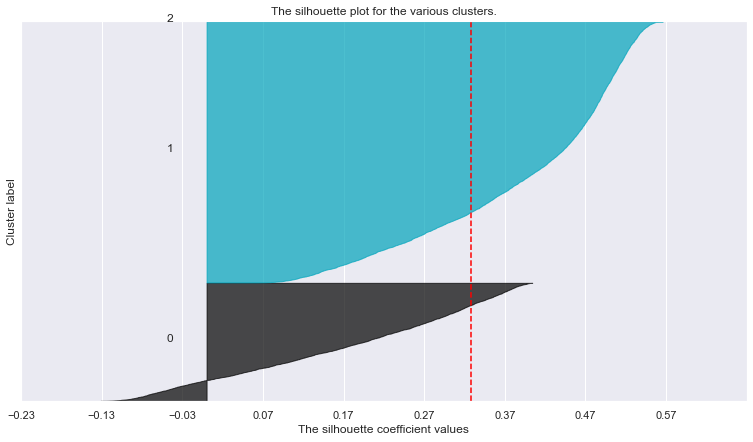

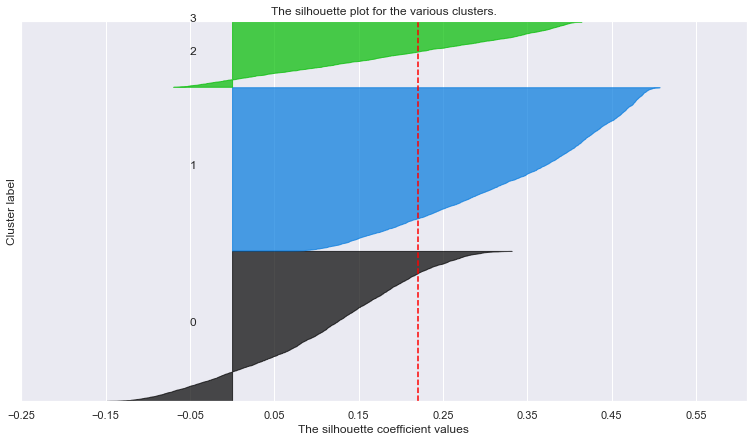

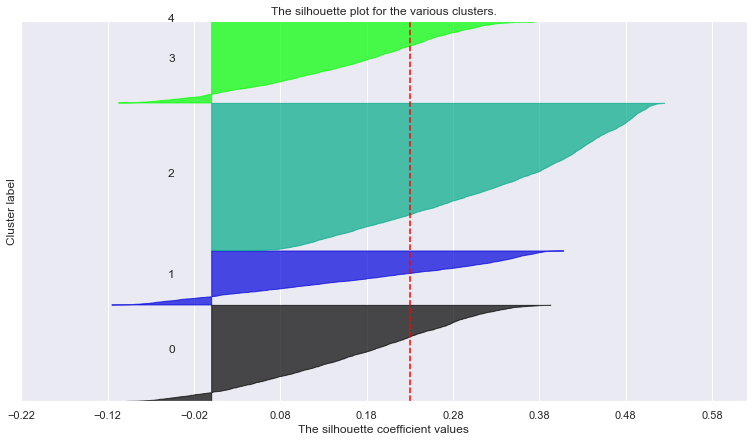

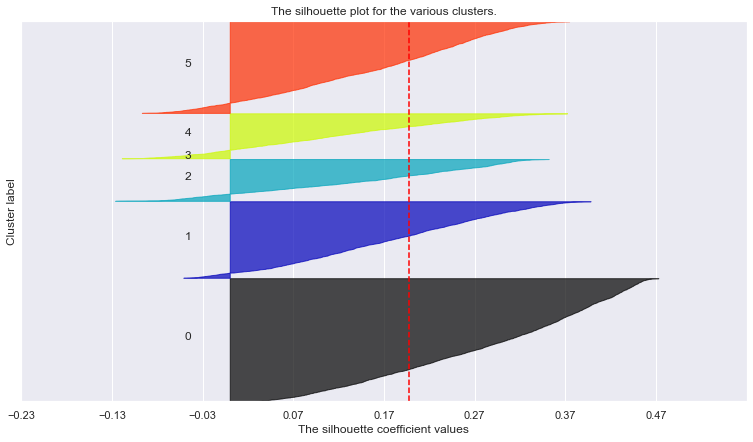

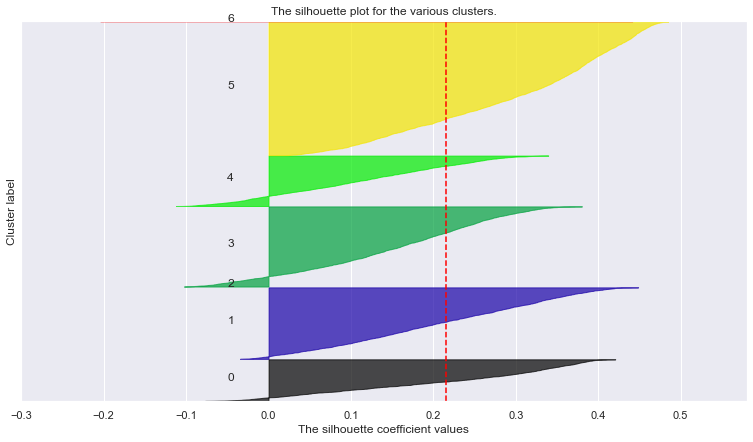

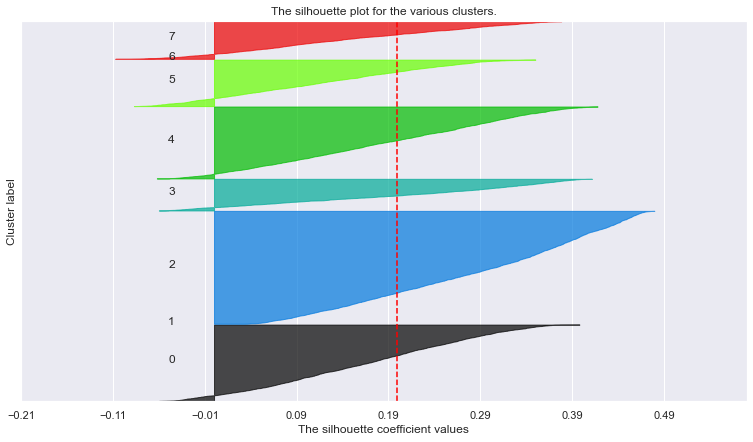

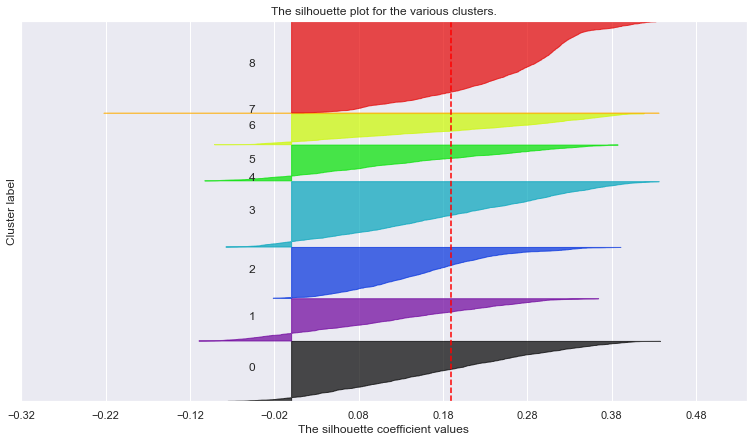

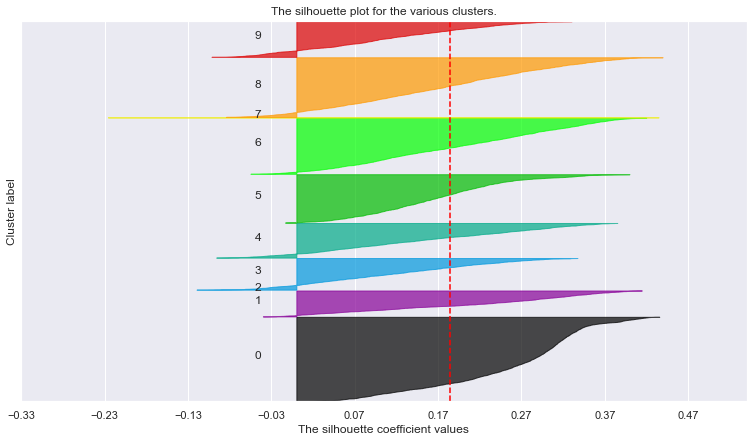

In [5]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# negative explained: https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(data) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))
    

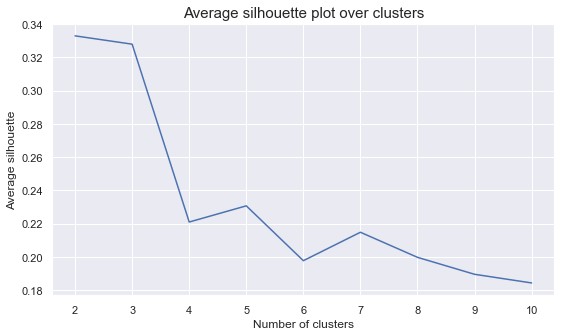

In [6]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:],avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [8]:
# final cluster solution
number_clusters = 2
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(data)
km_labels

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [40]:
df_final = pd.concat((data, pd.Series(km_labels, name='km_labels')), axis=1)
df_final.groupby('km_labels').mean()

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem,PC0,PC1,PC2,PC3,PC4
km_labels,,,,,,,,,,,,,,,,,
0,0.274719,-1.090939,-0.253330,-0.100350,-0.360144,-0.043953,-0.699855,1.175659,0.228843,1.010275,0.990938,1.382443,1.821323,-0.853852,-0.029987,-0.084770,-0.116926
1,-0.082078,-0.256808,0.102922,-0.096515,-0.265133,-0.079102,0.287313,-0.154994,-0.033213,-0.031864,-0.059844,-0.167420,-0.782806,0.366986,0.012888,0.036434,0.050255


### Analysing the appropriateness of our solution - R²

In [ ]:
def get_ss(data):
    ss = np.sum(data.var() * (data.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(data)  # get total sum of squares
ssw_labels = df_final[data.columns.to_list() + ["km_labels"]].groupby(by='km_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

In [27]:
labels = km_labels

features = data#.iloc[:, -5:]

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=labels, labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
sns.pairplot(df_final, hue='km_labels', palette = 'husl')

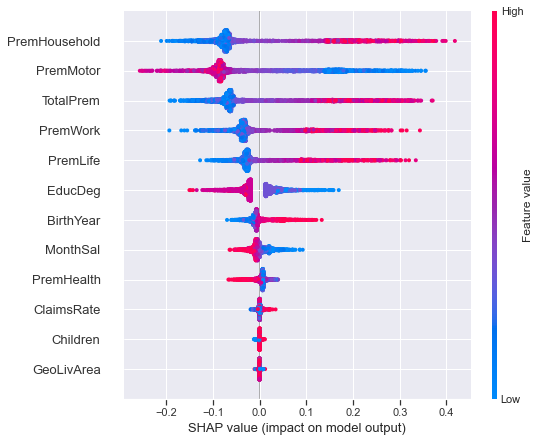

In [59]:


X = df_final.iloc[:, :-6]
y = df_final['km_labels']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)


  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[0], val_X)

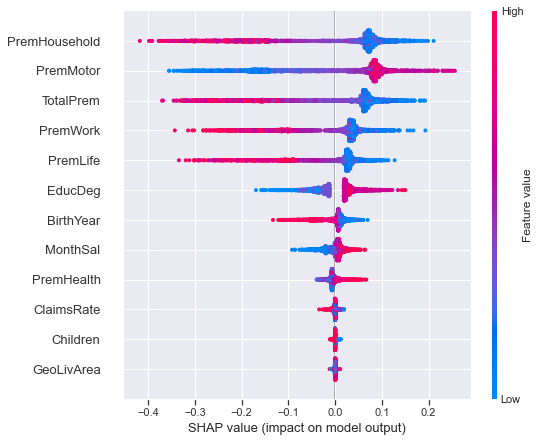

In [58]:
shap.summary_plot(shap_values[1], val_X)